#  📝 Práctica: Algoritmo de Otsu

## Nombre del alumno: Jesús Alberto Aréchiga Carrillo

## Fecha: 12/noviembre/2025

## Objetivo
El objetio de esta práctia consiste en implementar el algoritmo Otsu para segmentación binaria de una imágen en escala de grises.

## Implementación:
Primero, importa los módulos necesarios.

In [28]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Ahora, carga la imagen 'cuadrados.png', conviértela a escala de grises y muéstrala.

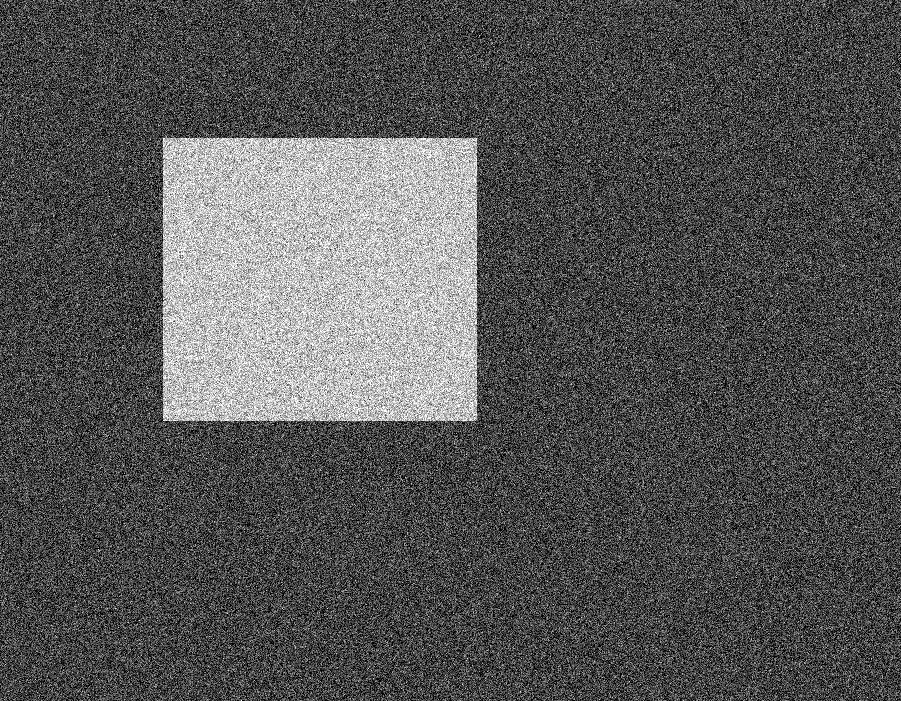

In [29]:
img = cv.imread('cuadrados.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

Calcula el histograma de intensidad de la imagen y muéstralo

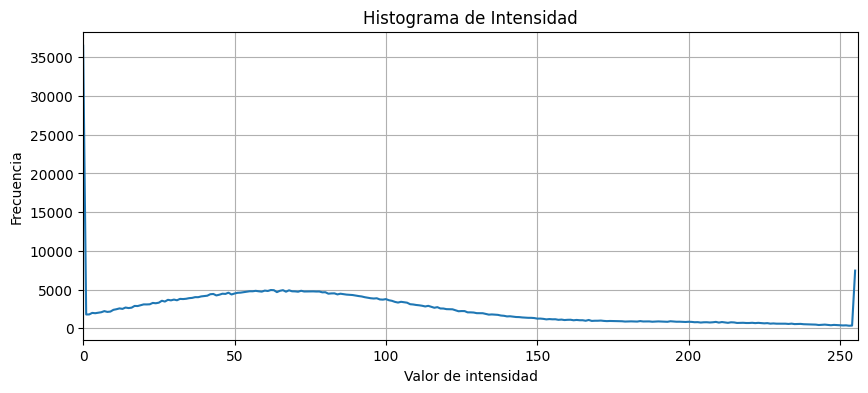

In [30]:
# Calcular histograma
hist = cv.calcHist([gray], [0], None, [256], [0, 256])

# Mostrar histograma
plt.figure(figsize=(10, 4))
plt.plot(hist)
plt.title('Histograma de Intensidad')
plt.xlabel('Valor de intensidad')
plt.ylabel('Frecuencia')
plt.xlim([0, 256])
plt.grid(True)
plt.show()

Implementa el algoritmo de Otsu descrito a continuación.


Para cada umbral k, desde el umbral k=0 hasta k=255


      1.   Calcular W_A(k)
      2.   Calcular W_B(k)
      3.   Calcular μ_A(k)
      4.   Calcular μ_B(k)
      5.   Calcular σ2_A(K)
      6.   Calcular σ2_B(K)  
      7.   Calcular σ2_D(K)










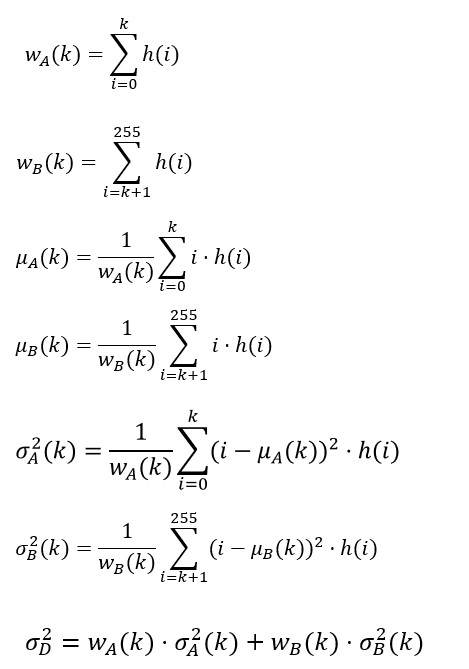

In [31]:
hist_norm = hist.flatten() / hist.sum()

W_A = np.zeros(256)
W_B = np.zeros(256)
mu_A = np.zeros(256)
mu_B = np.zeros(256)
sigma2_A = np.zeros(256)
sigma2_B = np.zeros(256)
sigma2_D = np.zeros(256)

for k in range(256):
    # 1. Calcular W_A(k)
    W_A[k] = np.sum(hist_norm[0:k+1])

    # 2. Calcular W_B(k)
    W_B[k] = np.sum(hist_norm[k+1:256])

    # 3. Calcular u_A(k)
    if W_A[k] > 0:
        mu_A[k] = np.sum(np.arange(0, k+1) * hist_norm[0:k+1]) / W_A[k]

    # 4. Calcular u_B(k)
    if W_B[k] > 0:
        mu_B[k] = np.sum(np.arange(k+1, 256) * hist_norm[k+1:256]) / W_B[k]

    # 5. Calcular σ2_A(k)
    if W_A[k] > 0:
        sigma2_A[k] = np.sum(((np.arange(0, k+1) - mu_A[k])**2) * hist_norm[0:k+1]) / W_A[k]

    # 6. Calcular σ2_B(k)
    if W_B[k] > 0:
        sigma2_B[k] = np.sum(((np.arange(k+1, 256) - mu_B[k])**2) * hist_norm[k+1:256]) / W_B[k]

    # 7. Calcular σ2_D(k) - Varianza intra-clase (within-class variance)
    sigma2_D[k] = W_A[k] * sigma2_A[k] + W_B[k] * sigma2_B[k]


Encuentra el umbral óptimo k* que minimiza la varianza entre las clases σ2_D(K).

Imprime el valor del umbral óptimo k*.

In [32]:
k_optimo = np.argmin(sigma2_D)

print(f"Umbral optimo k* = {k_optimo}")

Umbral optimo k* = 108


Grafica la variaza entre las clases σ2_D(K) para cada umbral k. Además, grafica el punto mínimo encontrado, el cual corresponde al umbrál óptimo k*.

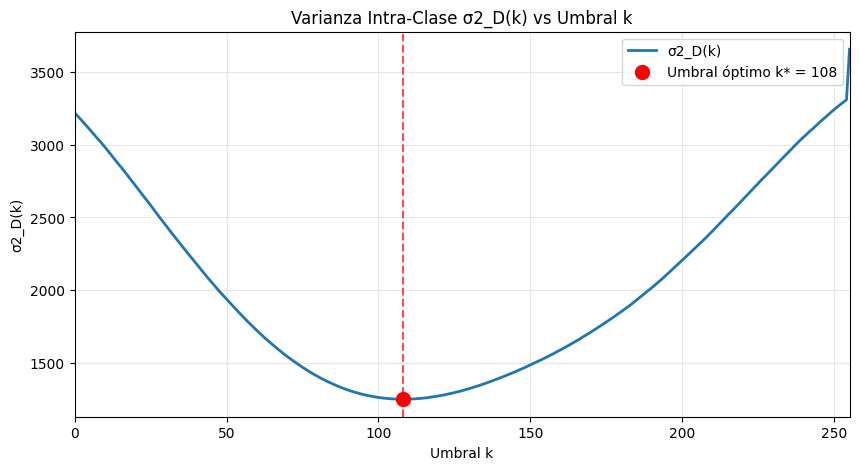

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(sigma2_D, linewidth=2, label='σ2_D(k)')

# Umbral optimo
plt.plot(k_optimo, sigma2_D[k_optimo], 'ro', markersize=10,
         label=f'Umbral óptimo k* = {k_optimo}')

# Línea vertical en el umbral optimo
plt.axvline(x=k_optimo, color='r', linestyle='--', alpha=0.7)

plt.title('Varianza Intra-Clase σ2_D(k) vs Umbral k')
plt.xlabel('Umbral k')
plt.ylabel('σ2_D(k)')
plt.xlim([0, 255])
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Binarizar la imagen utilizando el umbral óptimo k*. Muestra la imagen segmentada con el umbral óptimo.

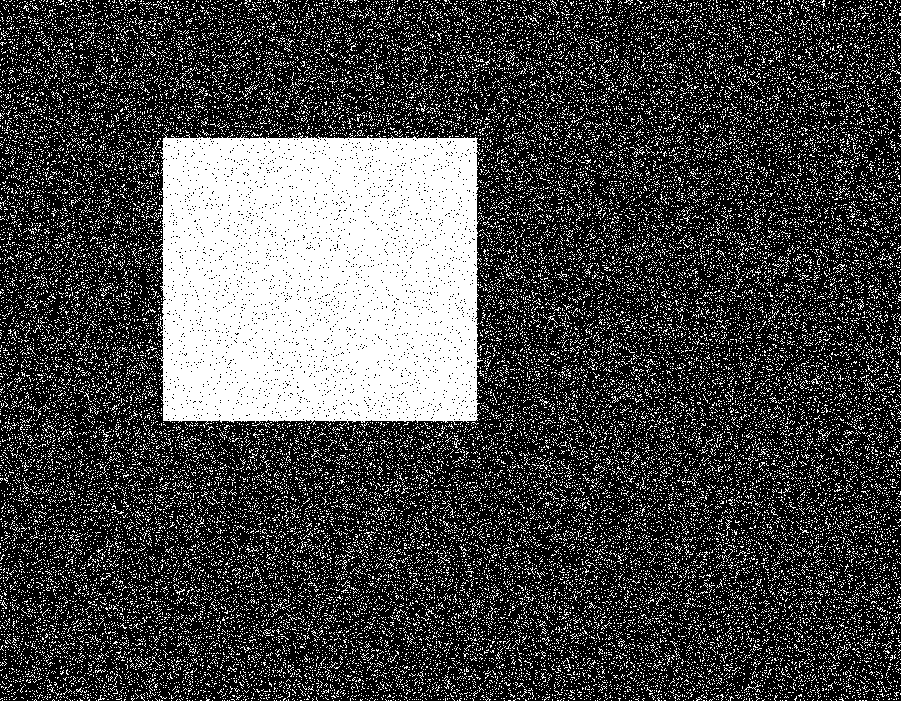

In [34]:
_, img_binarizada = cv.threshold(gray, k_optimo, 255, cv.THRESH_BINARY)

cv2_imshow(img_binarizada)

Muestra el histograma de intensidad de la imagen en escala de grises y dibuja la línea que indica el umbral óptimo k* encontrado.

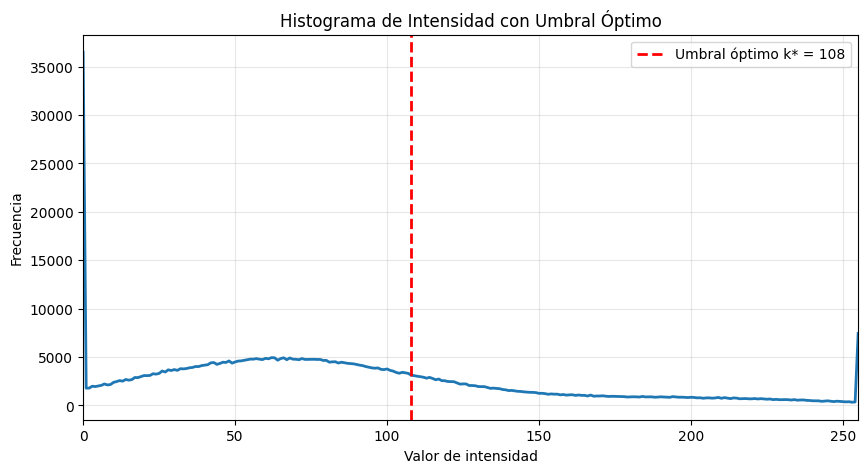

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(hist, linewidth=2)

plt.axvline(x=k_optimo, color='r', linestyle='--', linewidth=2,
            label=f'Umbral óptimo k* = {k_optimo}')

plt.title('Histograma de Intensidad con Umbral Óptimo')
plt.xlabel('Valor de intensidad')
plt.ylabel('Frecuencia')
plt.xlim([0, 255])
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Compara tus resultados con la función de openCV
Realiza la segmentación utilizando `cv.threshold(img,thresh=0,maxval=255,type=cv.THRESH_OTSU)` e imprime el umbral obtenido por la función.

Umbral obtenido por cv.threshold con THRESH_OTSU: 108.0
Umbral obtenido por implementacion manual: 108


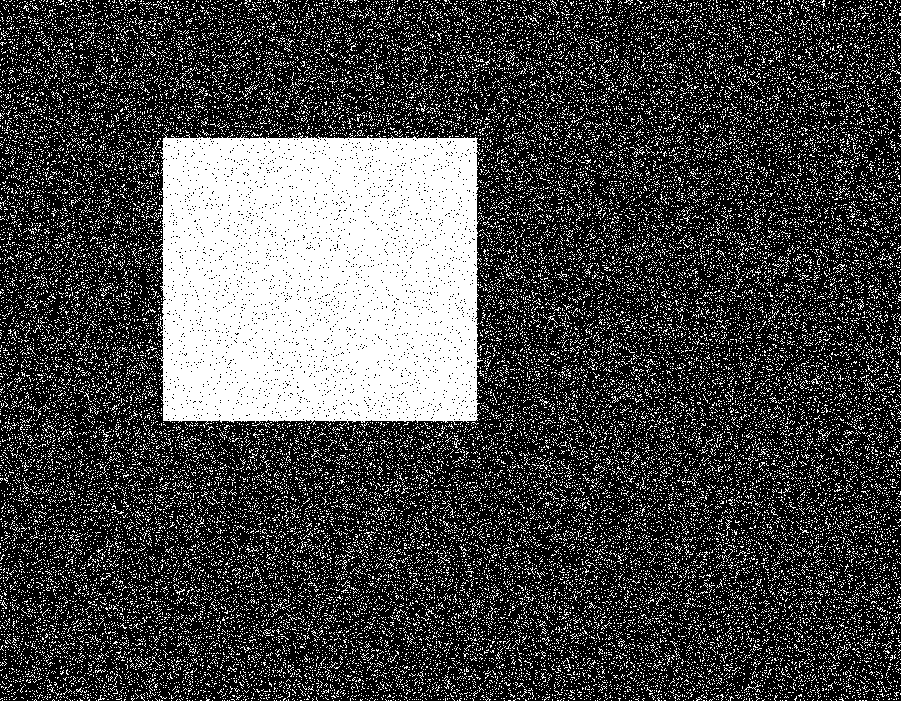

In [36]:
umbral_opencv, img_otsu_opencv = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

print(f"Umbral obtenido por cv.threshold con THRESH_OTSU: {umbral_opencv}")
print(f"Umbral obtenido por implementacion manual: {k_optimo}")

cv2_imshow(img_otsu_opencv)

Segmenta la imagen con el umbral encontrado y muéstrala junto con la imagen obtenida con el algoritmo que implementaste.

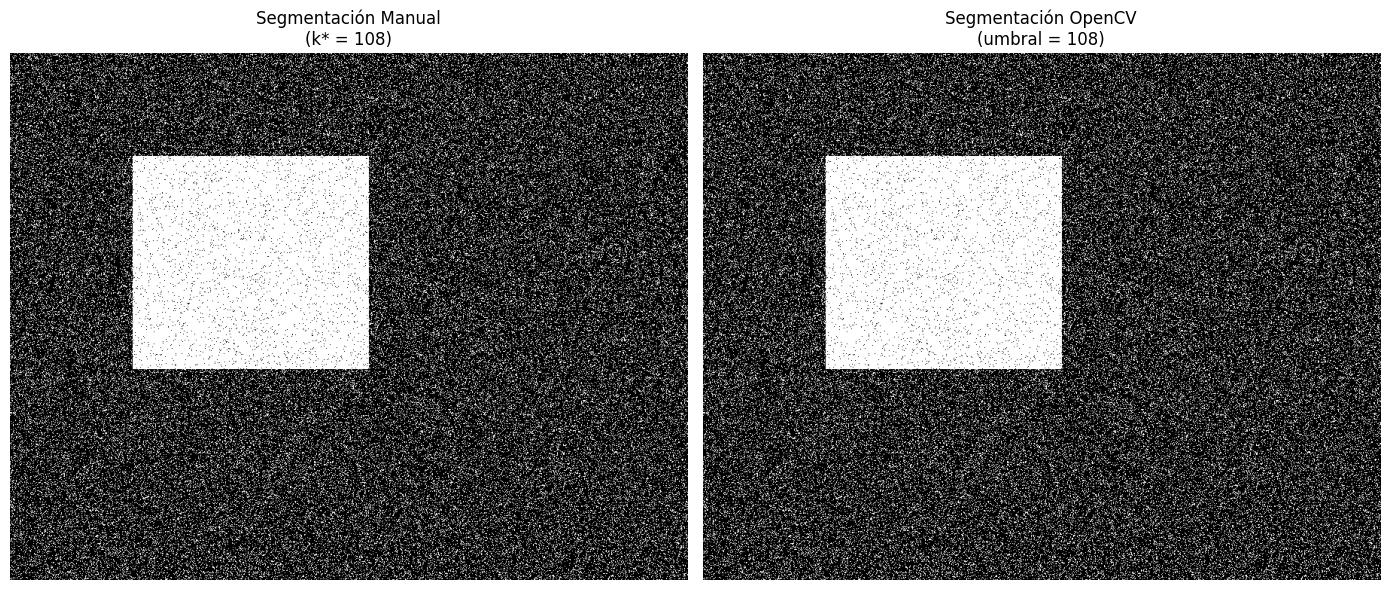

In [37]:
plt.figure(figsize=(14, 6))

# Imagen segmentada con implementación manual
plt.subplot(1, 2, 1)
plt.imshow(img_binarizada, cmap='gray')
plt.title(f'Segmentación Manual\n(k* = {k_optimo})')
plt.axis('off')

# Imagen segmentada con cv.THRESH_OTSU
plt.subplot(1, 2, 2)
plt.imshow(img_otsu_opencv, cmap='gray')
plt.title(f'Segmentación OpenCV\n(umbral = {int(umbral_opencv)})')
plt.axis('off')

plt.tight_layout()
plt.show()

Compara las imágenes y los umbrales. ¿Es el mismo umbral? ¿Las imágenes se ven igual?. Escribe tus conclusiones.

#Conclusiones:
Las imágenes tanto con el cálculo manual como con la función que tiene OpenCV son las mismas, es decir, tienen el mismo resultado. El umbral óptimo que ambos determinan es el mismo.
La función de OpenCV hace todos los cálculos necesarios para sacar el umbral y la imágen segmentada.